# Grid World - Frozen Lake

In this example we will look at [Frozen Lake](https://gym.openai.com/envs/FrozenLake-v0) a simple grid world example from [OpenAI Gym](https://gym.openai.com/). 

In this world, an agent has to navigate between a starting and an endpoint across a grid of possible positions.
In the setting of a frozen lake the agent has to retrieve an object (a frisbee) that has been thrown on the the ice covering the lake.

Each grid position is one of:
   * S: the starting point
   * F: frozen surface, safe to cross
   * H: hole, fall into the lake, the episode ends unsuccessfully
   * G: goal, object is retrieved and the reward obtained.

If the goal G is reached, the episode ends and the agent receives a reward of 1, if the agent falls into a hole, the episode ends and the reward is set to 0.

The grid-world can be explored in two settings: deterministic or stochastic.
In the deterministic setting, the action of the agent, i.e. in which direction
they travel, is always the intended direction.
In the stochastic setting, the agent goes into the intended direction with a probability of 1/3, i.e. 0.3333, and into one of two other directions with probability of 1/3.
This setting is controlled with the parameter ```is_slippery``` when setting up the environment.

Additionally, a larger environment with a 8x8 grid instead of the 4x4 grid used here exists.

We will use the deterministic setting in this exercise but you should explore the stochastic one as well.

In [1]:
# required imports

import gym
import numpy as np
import random
import matplotlib.pyplot as plt
%pylab inline
# large figures
rcParams['figure.figsize'] = 8, 6

# clear the output of the cell to avoid long output lists
# see http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output
from IPython.display import clear_output

# for the animation at the end
from matplotlib import animation
from IPython.display import display
import time


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# not sure we need it - but check if we're running in Google's free Colaboratory.
import sys
IN_COLAB = 'google.colab' in sys.modules
print (IN_COLAB)

True


## Explore the environment

We now load the game engine from OpenAI Gym and look at an example of the frozen lake grid world the agent has to master.

The agent always starts in the top left corner.

In [4]:
# smaller grid with a 4x4 grid  : FrozenLake-v0
# larger version with a 8x8 grid: FrozenLake8x8-v0
#env = gym.make("FrozenLake-v0", is_slippery=False)
env = gym.make("FrozenLake-v0", is_slippery=True)
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


The agent can follow one of 4 actions that are available
from the ```action_space```. In our case, we can move up, down, left, right.
Hence, there are four discrete actions, the specific meaning is encoded
in the environment.

The environment is based on an nxn grid and hence has $n^2$ states. For the 4x4 Frozen Lake example, this means we have 16 states, one for each position the agent can be on.


In [0]:
# there are two ways to obtain the number of actions:
# env.nA and env.action_space.n
print('Number of actions: {}'.format(env.nA))
print('Action space: {}'.format(env.action_space))

# there are two ways to obtain the numbers of states: 
# env.nS and env.observation_space.n
print('Number of states: {}'.format(env.nS) )


Number of actions: 4
Action space: Discrete(4)
Number of states: 16


We can try how an agent moves through the grid world if we randomly choose an action - we cannot expect to reach the goal G but we can observe the movement of the agent.

We use the method ```step(action)``` to execute an action the agent chooses.
This method returns the following values:
   * bservation: The next  state of the environment after executing the action, in our case the positon on the grid world
   * reward, in our case 0 or 1
   * done: indicates that the episode has ended
   * info: dictionary with debugging information - agents are not allowed to use this information.

In [0]:
observation = env.reset()
for i in range(0,5):
  print('Step {}'.format(i))
  #visual output
  env.render()
  print('Observation: {}'.format(observation))

  #get a random action
  a = env.action_space.sample()
  print('Action: {}'.format(a))

  #execute the action
  observation, reward, done, info =  env.step(a)
  print('Reward {}, Info {}'.format(reward, info))

  if done:
    print('End of episode')
    break



Step 0

SFFF
FHFH
FFFH
HFFG
Observation: 0
Action: 1
Reward 0.0, Info {'prob': 1.0}
Step 1
  (Down)
SFFF
FHFH
FFFH
HFFG
Observation: 4
Action: 3
Reward 0.0, Info {'prob': 1.0}
Step 2
  (Up)
SFFF
FHFH
FFFH
HFFG
Observation: 0
Action: 3
Reward 0.0, Info {'prob': 1.0}
Step 3
  (Up)
SFFF
FHFH
FFFH
HFFG
Observation: 0
Action: 3
Reward 0.0, Info {'prob': 1.0}
Step 4
  (Up)
SFFF
FHFH
FFFH
HFFG
Observation: 0
Action: 2
Reward 0.0, Info {'prob': 1.0}


We can manually set the agent to be in a specific state. In case of the Frozen Lake grid world, setting the state means we move the agent to a specific location on the grid.
Starting from 0, the position ```s=2``` is the third position in the first row.

In [0]:
env.env.s=2
env.render()

  (Right)
SFFF
FHFH
FFFH
HFFG


The function ```env.P```  represents the transition probabilities and can be used to evaluate the states and rewards for a specific state.
It is organized as ```env.P[state][action]``` and contains a list of the variables: ```probability```, ```next state```, ```reward```, ```done```.

In the deterministic setting, each transition probability has only one possible next state for each action, in the stochastic setting, each transition can result in one of three possible new states, the probability to end up in any of them is 1/3.

For example, for state env.s=2, we would have:

In [0]:
s=2
env.env.s=s
env.render()
for a in range(0, env.nA):
  print('P for State {}, action {}: {}'.format(s,a,env.P[s][a]) )


  (Right)
SFFF
FHFH
FFFH
HFFG
P for State 2, action 0: [(1.0, 1, 0.0, False)]
P for State 2, action 1: [(1.0, 6, 0.0, False)]
P for State 2, action 2: [(1.0, 3, 0.0, False)]
P for State 2, action 3: [(1.0, 2, 0.0, False)]


## Q-Learning

We now use Q-learning to train the agent.
In Q learning, we use the best action for a current state (exploitation), apart from a small exploratory part determined by a small probability $\epsilon$ were we choose a random action to learn how the environment reacts to our actions.

The Q-learning update rule is:
$$ Q(s,a) \leftarrow (1-\alpha) Q(s,a) + \alpha (r + \gamma \,\mathrm{max}_a Q(s^\prime,a))$$

where $\alpha$ is the learning rate, $\gamma$ the discount factor, $s$ is the current state, $s^\prime$ is the next state and $a$ are all actions.

In this implementation we use a tabular approach, i.e. we record all Q-values in a big table.

During training, we learn from the environment by executing actions and observe new states and rewards until an episode ends. Then we repeat the process for a large number of episodes to fill the Q-table accurately.

Since the environment is stochastic and we can fail easily, the
exploration probability needs to be fairly large, though 
we could decrease it as the training progresses and the Q-value
table is filled.

In [5]:
# greedy exploration probability
eps = 0.3

# learning rate
alpha = 0.3

#discount factor
gamma = 0.95

#number of episodes to train over:
n_episodes = 5000

# table of Q values
q_table = np.zeros([env.nS, env.nA])

# counter for how long each epoch lasted
epoch_list = []
reward_list = []

# loop over all episodes 
# (let the index run from 1 instead of 0 as we would count from 1)
for i in range(1, n_episodes+1):
  if i% 10 == 0:
    clear_output(wait=True)
    print('Now in episode {}'.format(i))

  # initialize each new episode
  state = env.reset()  # set the environment back to starting setting
                       # this returns the first observation, i.e. the 
                       # starting state environment is in.
  epochs  = 0          # counter how long a given episode runs until it terminates
  rSum    = 0          # overall reward for this episode
  done    = False
  j       = 0

  # now interact with the environment until the episode ends
  # i.e. we either reach the goal or fall into a hole
  # protect against run-away processes and limit to 500 steps per episode
  while not done and j < 500:

    j += 1

    # choose an action - random action with probability epsilon 
    #  exploration, best currently known action with probability (1-epsilon)
    randNo = random.uniform(0,1)
    if randNo < eps:
      action = env.action_space.sample() # choose random action
    else:
      action = np.argmax(q_table[state]) # choose current best action

    

    # now interact with the environment: execute the action and observe new state
    next_state, reward, done, info = env.step(action)
    #if reward >0:
    #  print ('Reward: {}'.format(reward))

    # add a small negative penalty if we're not successful, 
    # helps to speed up training (at least in deterministic case)
    if reward==0 :
      reward=-0.001

    # update Q-values
    Q_now     = q_table[state, action]       # what we currently know from the table
    max_value = np.max(q_table[next_state])  # new best Q value

    q_table[state, action] = (1-alpha)*Q_now + alpha*(reward + gamma*max_value)


    # increase counter
    epochs += 1

    # save total reward
    rSum   += reward

    # end of interaction, the new state becomes the current state
    state = next_state
  else:
    epoch_list.append(epochs)
    reward_list.append(rSum)



Now in episode 5000


In [6]:
#Average number of steps in each episode
print(int(np.mean(epoch_list)))

14


How a distribution of how long each episode was, i.e. how long the agent needed
to reach the goal or fall into a hole.

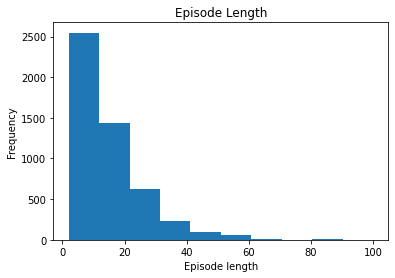

In [7]:
plt.hist(epoch_list)
plt.title('Episode Length')
plt.xlabel('Episode length')
plt.ylabel('Frequency')
plt.show()

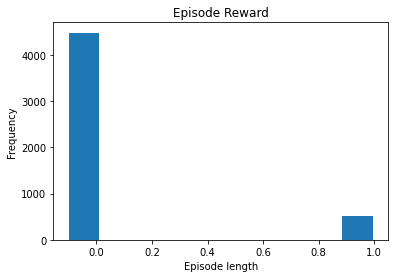

In [8]:
plt.hist(reward_list)
plt.title('Episode Reward')
plt.xlabel('Episode length')
plt.ylabel('Frequency')
plt.show()

This is the tabular list of Q-values to determine the best action.
The actions are ordered in the columns as left / down / right  / up

In [9]:
print(q_table)

[[0.13775986 0.10579267 0.11858893 0.11336296]
 [0.06201256 0.047707   0.04004209 0.08800725]
 [0.08605525 0.08758808 0.08580799 0.08736809]
 [0.04915629 0.04522387 0.01921714 0.08567113]
 [0.12641212 0.09052625 0.11866346 0.10571829]
 [0.         0.         0.         0.        ]
 [0.08627082 0.06650097 0.06128341 0.01321445]
 [0.         0.         0.         0.        ]
 [0.18417972 0.18786766 0.05422604 0.21394355]
 [0.30593438 0.30561512 0.25453652 0.16295473]
 [0.29067408 0.19503914 0.10395681 0.22757036]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.17645462 0.11448183 0.44945988 0.44081817]
 [0.55328546 0.57222524 0.50874842 0.55768021]
 [0.         0.         0.         0.        ]]


Now let the agent run and see how we reach the goal

In [13]:
state  = env.reset()


for i in range(200):
  action = np.argmax(q_table[state,:])
  new_state, reward, done, info = env.step(action)
  env.render()
  print('Done? {}'.format(done))
  state = new_state
  if done:
    print('Episode ends. Reward: {}, Number of steps: {}'.format(reward,i))
    break

  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FHFH
FFFH
HFFG
Done? False
  (Left)
SFFF
FH

Show the same thing but as an animation at the end.

In [18]:
frames = []
state  = env.reset()
max_iter = 250

for i in range(200):
  action = np.argmax(q_table[state,:])
  new_state, reward, done, info = env.step(action)
  env.render()
  print('Done? {}'.format(done))
  state = new_state



  frames.append({
      'frame'  : env.render(mode='ansi'),
      'state'  : state,
      'action' : action,
      'reward' : reward,
      'done'   : done
  })

  if done:
    break

print(len(frames))

for i, frame in enumerate(frames):
  clear_output(wait=True)
  print(frame['frame'])
  print(f"Timestep: {i}")
  print(f"State: {frame['state']}")
  print(f"Action: {frame['action']}")
  print(f"Reward: {frame['reward']}")
  print(f"Done: {frame['done']}")
  time.sleep(.2)



  (Down)
SFFF
FHFH
FFFH
HFFG

Timestep: 39
State: 15
Action: 1
Reward: 1.0
Done: True
